# Atividade: Redes Mundo Pequeno

## Imports e Funções

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def create_sw_network(N:int,Z:int,p:float,seed:int)->nx.Graph:
    """
    Função que cria uma rede de mundo pequeno.
    """
    
    g = nx.Graph()
    g.add_nodes_from([*range(N)])
    # Cria arestas iniciais
    for i in range(N):
        new_edges = [(i,(i+j)%N) for j in range(-int(Z/2),int(Z/2)+1) if (i+j)%N != i]
        g.add_edges_from(new_edges)
    # Cria arestas aleatórias
    num_rand_edges = int(p*N*Z/2)
    np.random.seed(seed)
    
    rand_edges = [np.random.choice(N,size=2,replace=True) for _ in range(num_rand_edges)]
    g.add_edges_from(rand_edges)
    
    return g

def FindPathLengthsFromNode(g:nx.Graph,src_node:int)->list[int]:
    """
    Função que encontra as distâncias de todos os nós dado um nó inicial, por meio de uma BFS.
    """
    bfs_layers = list(nx.bfs_layers(g,src_node))
    distances = np.concatenate([dist*np.ones(len(layer),dtype=np.int32) for dist,layer in enumerate(bfs_layers)])

    concat_layers = np.concatenate(bfs_layers)

    sorted_distances = [dist for _, dist in sorted(zip(concat_layers, distances))]
    return sorted_distances

def FindAllPathLengths(g:nx.Graph)->list[int]:
    """
    Função que encontra a distância de todos para todos.
    """
    path_lengths = []
    for src_node in range(g.number_of_nodes()):
        path_lengths += FindPathLengthsFromNode(g,src_node)
        
    return path_lengths

def FindAveragePathLength(g:nx.Graph)->float:
    """
    Função que encontra a distância média entre nós.
    """
    all_path_lengths = FindAllPathLengths(g)
    return np.mean(all_path_lengths)

## Experimento 1: Função FindAllPathLengths

In [21]:
seed = 2022
N = 20
Z=4
p=0

g = create_sw_network(N,Z,p,seed)

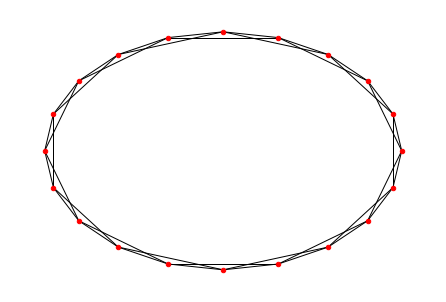

In [22]:
nx.draw_circular(g,node_color='red',with_labels=False,node_size=20)

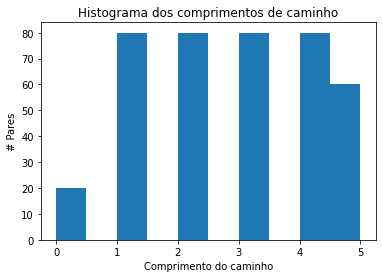

In [23]:
plt.title("Histograma dos comprimentos de caminho")
plt.xlabel("Comprimento do caminho")
plt.ylabel("# Pares")
plt.hist(FindAllPathLengths(g),bins=10)
plt.show()

* Observa-se que, para valores entre 0<l<5 (N/Z=5), a distribuição é uniforme, assim como esperado.

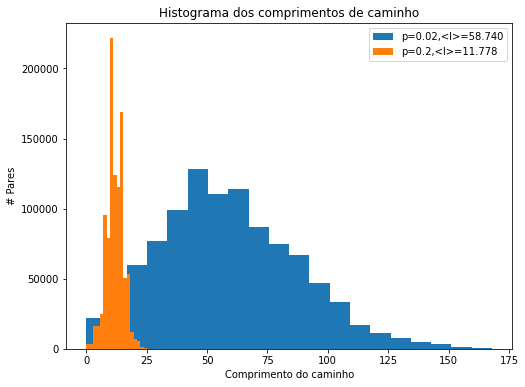

In [24]:
N = 1000
Z = 2


plt.figure(figsize=(8,6))
plt.title("Histograma dos comprimentos de caminho")
plt.xlabel("Comprimento do caminho")
plt.ylabel("# Pares")
for p in [0.02,0.2]:
    g = create_sw_network(N,Z,p,seed)
    plt.hist(FindAllPathLengths(g),bins=20,label=f'p={p},<l>={FindAveragePathLength(g):.3f}')
plt.legend()
plt.show()

* Nota-se que o histograma muda significativamente com a mudança de p: um valor 10x maior de p resultou em uma média 5x menor do tamanho dos caminhos na rede. Tal mudança era esperada, tendo em vista que, por definição, o valor de p define a proporção de atalhos criados.

  0%|          | 0/4 [00:00<?, ?it/s]

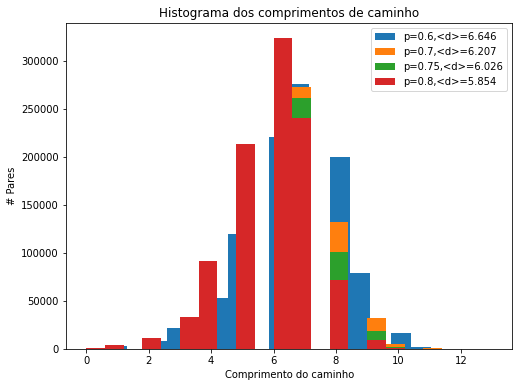

In [25]:
plt.figure(figsize=(8,6))
plt.title("Histograma dos comprimentos de caminho")
plt.xlabel("Comprimento do caminho")
plt.ylabel("# Pares")
for p in tqdm([0.6,0.7,0.75,0.8]):
    g = create_sw_network(N,Z,p,seed)
    plt.hist(FindAllPathLengths(g),bins=20,label=f'p={p},<d>={FindAveragePathLength(g):.3f}')
plt.legend()
plt.show()

* Experimentalmente é possível perceber que um valor de p: 0.75 < p < 0.8 nos leva a ter um comprimento médio de valor 6, isto é, o famoso "seis graus de separação".

## Experimento 2: Função FindAveragePathLength

In [8]:
N = 100
Z = 2
p = 0.1
num_experiments = 100

avg_lengths = []
for seed in range(num_experiments):
    np.random.seed(seed)
    g = create_sw_network(N,Z,p,seed)
    avg_lengths.append(FindAveragePathLength(g))
    
print(f"Mean Average length throughout {num_experiments} experiments: {np.mean(avg_lengths):.3f} ± {np.std(avg_lengths):.3f}")

Mean Average length throughout 100 experiments: 9.614 ± 0.799


* Flutuações nas distâncias são esperadas devido ao processo probabilístico de geração de atalhos.
* Existem aproximadamente (p * N * Z)/2 = (0.1 * 100 * 2)/2=10 arestas longas nesse sistema.

## Experimento 3: Tamanho médio para valores p variando

  0%|          | 0/100 [00:00<?, ?it/s]

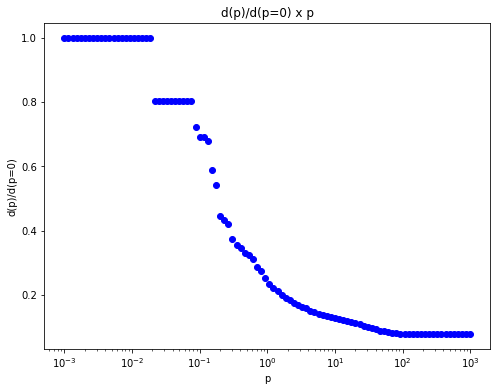

In [19]:
seed = 2022
N = 50
Z = 2

p_values = np.logspace(-3,3,base=10,num=100)

avg_length_p0 = FindAveragePathLength(create_sw_network(N,Z,0,seed))
avg_lengths = []

for p in tqdm(p_values):
    g = create_sw_network(N,Z,p,seed) 
    avg_lengths.append(FindAveragePathLength(g)/avg_length_p0)
    
plt.figure(figsize=(8,6))
plt.title("d(p)/d(p=0) x p")
plt.xlabel("p")
plt.ylabel("d(p)/d(p=0)")
plt.semilogx(p_values,avg_lengths,'bo')
plt.show()

* Para valores de p pequenos, o valor de d(p) se aproxima de d(p=0), e portanto a razão d(p)/d(p=0) é aproximadamente 1, e portanto para valores pequenos a razão tende a se manter no valor constante 1.

## Experimento 4: Grande N e a emergência de um limite contínuo

In [10]:
seed = 2023
N = 50
Z = 2

g = create_sw_network(N,Z,0.1,seed)

nx_g1 = nx.newman_watts_strogatz_graph(N,Z,0.01,seed)
nx_g2 = nx.newman_watts_strogatz_graph(N,Z,0.1,seed)

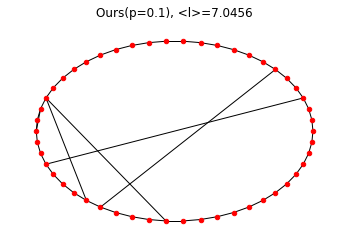

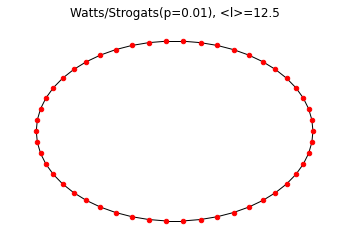

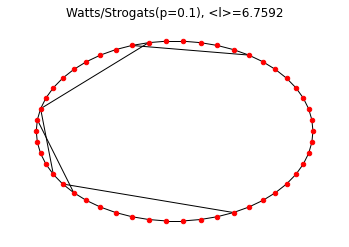

In [11]:
for graph,title in zip([g,nx_g1,nx_g2],["Ours(p=0.1)","Watts/Strogats(p=0.01)","Watts/Strogats(p=0.1)"]):
    plt.title(title + f", <l>={FindAveragePathLength(graph)}")
    nx.draw_circular(graph,node_color='red',with_labels=False,node_size=20)
    plt.show()

* O grafo gerado com p = 0.1 é estatísticamente mais semelhante ao grafo gerado usando o nosso código.

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

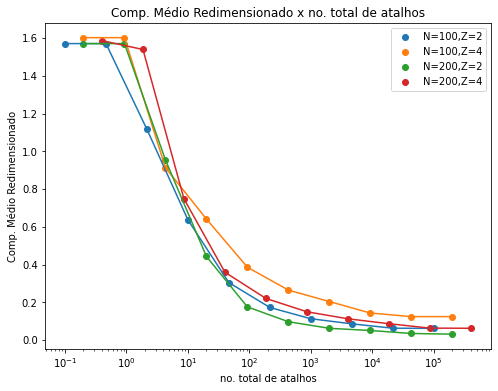

In [18]:
seed = 1234
p_values = np.logspace(-3,3,base=10,num=10)

plt.figure(figsize=(8,6))

plt.title("Comp. Médio Redimensionado x no. total de atalhos")
plt.xlabel("no. total de atalhos")
plt.xscale('log')
plt.ylabel("Comp. Médio Redimensionado")
for N in [100,200]:
    for Z in [2,4]:
        avg_redim_path = []
        total_path_num = []
        for p in tqdm(p_values):
            g = create_sw_network(N,Z,p,seed)
            avg_redim_path.append(np.pi*Z*FindAveragePathLength(g)/N)
            total_path_num.append(p*N*Z/2)
        plt.scatter(total_path_num,avg_redim_path,label=f"N={N},Z={Z}")
        plt.plot(total_path_num,avg_redim_path)
        
plt.legend()
plt.show()
        

## Experimento 5: Rede real (Campanha de Napoleão na Rússia)

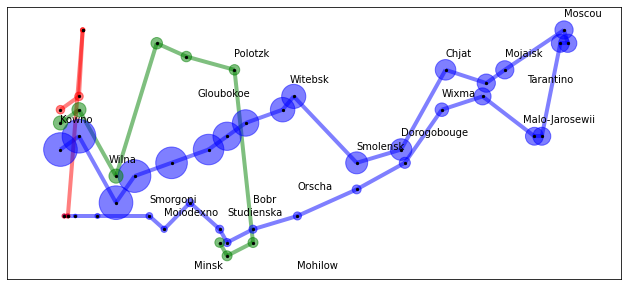

In [144]:
def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split("\n"):
        x, y, name = line.split(",")
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split("\n"):
            x, y, p, r, n = line.split(",")
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


(graphs, city) = minard_graph()

plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["b", "g", "r"]
for G in graphs:
    c = colors.pop(0)
    node_size = [G.pop[n] // 300 for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

# nodes = 35; # edges = 34 


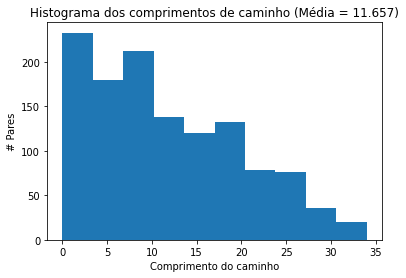

# nodes = 9; # edges = 8 


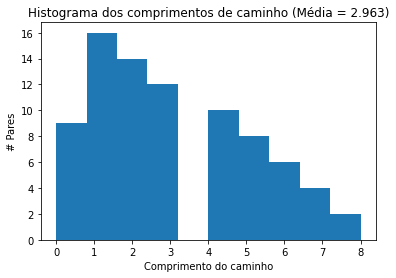

# nodes = 6; # edges = 5 


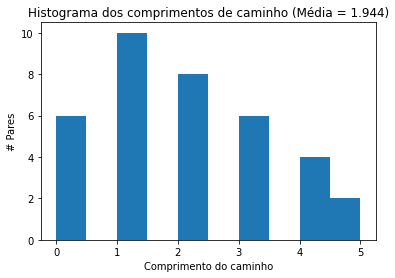

In [147]:
for g in graphs:
    print(f"# nodes = {g.number_of_nodes()}; # edges = {g.number_of_edges()} ")
    plt.title(f"Histograma dos comprimentos de caminho (Média = {FindAveragePathLength(g):.3f})")
    plt.xlabel("Comprimento do caminho")
    plt.ylabel("# Pares")
    plt.hist(FindAllPathLengths(g),bins=10)
    plt.show()